## **Modelos de Regresión Lineal**

In [54]:
## FUNCION SAVE EXCEL
## #######################
## #######################
## #######################

# Cargamos el archivo Excel - RFF Procesado
# --------------

ruta_path = 'C:/cesar_quezada/ProyectosIA/Proyectos_PALMAS'               # -> Casa

def function_save(df_x):
    # Especifica la ruta donde deseas guardar el CSV
    ruta_save =  '/PROYECTO_01_analitica_descriptiva_TEA/data/processed/__bbdd_revision__.xlsx'  # Cambia esta ruta a la que necesites
    df_x.to_excel(ruta_path + ruta_save, index=False)
    print(f'Datos guardados en {ruta_path + ruta_save}')


In [7]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 435.7 kB/s eta 0:00:26
   ---------------------------------------- 0.0/11.0 MB 326.8 kB/s eta 0:00:34
   ---------------------------------------- 0.1/11.0 MB 656.4 kB/s eta 0:00:17
    --------------------------------------- 0.1/11.0 MB 655.8 kB/s eta 0:00:17
    --------------------------------------- 0.2/11.0 MB 573.4 kB/s eta 0:00:19
    --------------------------------------- 0.2/11.0 MB 801.7 kB/s eta 0:00:14
   - -------------------------------------- 0.3/11.0 MB 896.4 kB/s eta 0:00:12
   - -------------------------------------- 0.3/11.0 MB 873.8 kB/s eta 0:00:13
   - -------------------------------------- 0.5/11.0 MB 1.2 MB/s eta 0:00:09
   -- ------------------------------------- 0.6/11.0 MB 1.2 MB/s eta 0:00:09
   --- ------------------------------------ 0.8/11.0 MB 1.6 MB/s eta 0:00:


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd # Dataframes
import numpy as np # Arreglos y matrices
import scipy.stats as stats 
import matplotlib.pyplot as plt # Graficos
import seaborn as sns  # para análisis gráficos
import random # para generar aleatorios

Información del atributo (en orden):

Los datos del precio de la vivienda de Boston se han utilizado en muchos documentos de aprendizaje automático que abordan la regresión

- **CRIM**: tasa de criminalidad per cápita por ciudad
- **ZN**: proporción de tierra residencial dividida en zonas para lotes de más de 25,000 pies cuadrados.
- **INDUS**: proporción de acres de negocios no minoristas por ciudad
- **CHAS**: variable ficticia Charles River (= 1 si el tramo limita con el río; 0 en caso contrario)
- **NOX**: concentración de óxidos nítricos (partes por 10 millones)
- **RM**: número medio de habitaciones por vivienda
- **EDAD**: proporción de unidades ocupadas por el propietario construidas antes de 1940
- **DIS**: distancias ponderadas a cinco centros de empleo de Boston
- **RAD**: índice de accesibilidad a autopistas radiales
- **IMPUESTO**: tasa impositiva sobre el valor total de la propiedad por 10,000
- **PTRATIO**: relación alumno-profesor por localidad
- **B**: 1000 (Bk - 0.63) ^ 2 donde Bk es la proporción de negros por ciudad
- **LSTAT**:% menor estado de la población
- **MEDV**: valor medio de viviendas ocupadas por el propietario en $ 1000


### 1. Carga de datos

In [100]:
# uploaded = files.upload()

ruta_path_sh = 'C:/cesar_quezada/ProyectosIA/Proyectos_PALMAS/PROYECTO_01_analitica_descriptiva_TEA/data/processed/Calidad de racimos vs TEA'
# df_regresion_sh= pd.read_excel(ruta_path_sh + '/__bbdd_revision__SHANUSI.xlsx', sheet_name='data')
df_regresion_sh= pd.read_excel(ruta_path_sh + '/__bbdd_revision__PALMAWASI.xlsx', sheet_name='data')

df_regresion_sh.head()

,FECHA,TEA_total,RFFProcesado,RFFProcesadoPropios,RFFProcesadoTerceros,CPOObtenido,% Peso_VERDES_ propios,% Peso_MADUROS_ propios,% Peso_SMADUROS_ propios,% Peso_ESCOBAJO_ propios,% Peso_MALFORMADOA_ propios,% Peso_MALFORMADOB_ propios,% Peso_VERDES_ terceros,% Peso_MADUROS_ terceros,% Peso_SMADUROS_ terceros,% Peso_ESCOBAJO_ terceros,% Peso_MALFORMADO_ terceros
0,2022-08-22,0.246380,6734.08,5866.84998,867.23002,1659.14,0.019060,0.816653,0.033543,0,0.023284,0.005230,0.001074,0.115195,0.014134,0.000340,0.000665
1,2022-08-29,0.263644,5850.91,4926.03001,924.87999,1542.56,0.023626,0.775354,0.043661,0,0.025143,0.003033,0.001266,0.137584,0.017999,0.000510,0.000341
2,2022-09-05,0.255344,5843.30,4990.25002,853.04998,1492.05,0.038944,0.763579,0.044563,0,0.026613,0.006790,0.001379,0.134030,0.017008,0.000497,0.000835
3,2022-09-12,0.248932,5859.63,5019.70000,839.93000,1458.65,0.018490,0.800417,0.037093,0,0.032357,0.006163,0.001213,0.126378,0.016065,0.000344,0.001278
4,2022-09-19,0.253619,6135.81,5082.20999,1053.60001,1556.16,0.023254,0.779447,0.039334,0,0.023553,0.006635,0.001419,0.137589,0.018444,0.000513,0.001873


In [101]:
df_regresion_sh = df_regresion_sh.drop(['FECHA'],axis = 1)
df_regresion_sh = df_regresion_sh.drop(['RFFProcesado'],axis = 1)
df_regresion_sh = df_regresion_sh.drop(['RFFProcesadoPropios'],axis = 1)
df_regresion_sh = df_regresion_sh.drop(['RFFProcesadoTerceros'],axis = 1)
df_regresion_sh = df_regresion_sh.drop(['TEA_total'],axis = 1)
# df_regresion_sh = df_regresion_sh.drop(['CPOObtenido'],axis = 1)
df_regresion_sh.head()

,CPOObtenido,% Peso_VERDES_ propios,% Peso_MADUROS_ propios,% Peso_SMADUROS_ propios,% Peso_ESCOBAJO_ propios,% Peso_MALFORMADOA_ propios,% Peso_MALFORMADOB_ propios,% Peso_VERDES_ terceros,% Peso_MADUROS_ terceros,% Peso_SMADUROS_ terceros,% Peso_ESCOBAJO_ terceros,% Peso_MALFORMADO_ terceros
0,1659.14,0.019060,0.816653,0.033543,0,0.023284,0.005230,0.001074,0.115195,0.014134,0.000340,0.000665
1,1542.56,0.023626,0.775354,0.043661,0,0.025143,0.003033,0.001266,0.137584,0.017999,0.000510,0.000341
2,1492.05,0.038944,0.763579,0.044563,0,0.026613,0.006790,0.001379,0.134030,0.017008,0.000497,0.000835
3,1458.65,0.018490,0.800417,0.037093,0,0.032357,0.006163,0.001213,0.126378,0.016065,0.000344,0.001278
4,1556.16,0.023254,0.779447,0.039334,0,0.023553,0.006635,0.001419,0.137589,0.018444,0.000513,0.001873


### 2. Regresión lineal simple

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Analisis de correlación

In [102]:
vivienda = df_regresion_sh

In [103]:
# Antes de poder realizar el modelo de regresión lineal debemos ver si existe asociación y de qué tipo es.
# coeficiente de correlación
vivienda.corr()

,CPOObtenido,% Peso_VERDES_ propios,% Peso_MADUROS_ propios,% Peso_SMADUROS_ propios,% Peso_ESCOBAJO_ propios,% Peso_MALFORMADOA_ propios,% Peso_MALFORMADOB_ propios,% Peso_VERDES_ terceros,% Peso_MADUROS_ terceros,% Peso_SMADUROS_ terceros,% Peso_ESCOBAJO_ terceros,% Peso_MALFORMADO_ terceros
CPOObtenido,1.000000,0.254918,0.735752,-0.032656,NaN,0.050404,0.151824,-0.567009,-0.681435,-0.707749,-0.388350,-0.473073
% Peso_VERDES_ propios,0.254918,1.000000,0.161432,0.267433,NaN,0.595214,0.536594,0.144940,-0.440307,-0.071287,0.193496,-0.057974
% Peso_MADUROS_ propios,0.735752,0.161432,1.000000,0.035207,NaN,0.209187,0.290772,-0.722019,-0.914629,-0.922005,-0.511205,-0.436066
% Peso_SMADUROS_ propios,-0.032656,0.267433,0.035207,1.000000,NaN,0.553215,0.535657,0.110557,-0.373350,-0.129601,0.152985,-0.304751
% Peso_ESCOBAJO_ propios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
% Peso_MALFORMADOA_ propios,0.050404,0.595214,0.209187,0.553215,NaN,1.000000,0.759322,0.178798,-0.488824,-0.034317,0.273279,-0.035671
% Peso_MALFORMADOB_ propios,0.151824,0.536594,0.290772,0.535657,NaN,0.759322,1.000000,0.072026,-0.534000,-0.191274,0.165851,-0.257733
% Peso_VERDES_ terceros,-0.567009,0.144940,-0.722019,0.110557,NaN,0.178798,0.072026,1.000000,0.558275,0.698582,0.581328,0.234703
% Peso_MADUROS_ terceros,-0.681435,-0.440307,-0.914629,-0.373350,NaN,-0.488824,-0.534000,0.558275,1.000000,0.840566,0.341621,0.468238
% Peso_SMADUROS_ terceros,-0.707749,-0.071287,-0.922005,-0.129601,NaN,-0.034317,-0.191274,0.698582,0.840566,1.000000,0.613302,0.543207


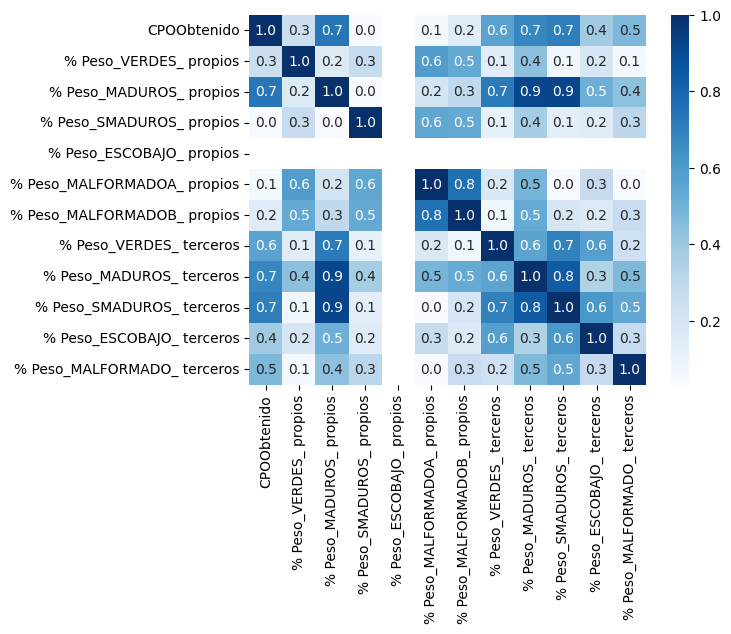

In [104]:
# Gráfico de calor de correlaciones
sns.heatmap(abs(vivienda.corr()), annot=True, fmt='.1f', cmap='Blues')
plt.show()

In [ ]:
# Gráfico de dispersión multiple
par= sns.pairplot(vivienda)

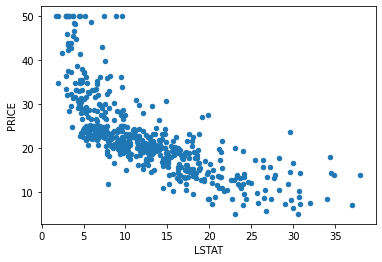

In [10]:
# diagrama de dispersión
disp= vivienda.plot(kind='scatter', x='LSTAT', y='PRICE')

### 3. Regresión lineal múltiple

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
vivienda.columns

Index(['TEA_total', 'RFFProcesado', 'RFFProcesadoPropios',
       'RFFProcesadoTerceros', 'CPOObtenido', '% Peso_VERDES_ propios',
       '% Peso_MADUROS_ propios', '% Peso_SMADUROS_ propios',
       '% Peso_ESCOBAJO_ propios', '% Peso_MALFORMADOA_ propios',
       '% Peso_MALFORMADOB_ propios', '% Peso_VERDES_ terceros',
       '% Peso_MADUROS_ terceros', '% Peso_SMADUROS_ terceros',
       '% Peso_ESCOBAJO_ terceros', '% Peso_MALFORMADO_ terceros'],
      dtype='object')

In [105]:
# Al dataset o set de entrenamiento le retiramos la variable dependiente o target
# X = vivienda.drop("TEA_total",axis=1) # covariables
# Y = vivienda['TEA_total'] # target

X = vivienda.drop("CPOObtenido",axis=1) # covariables
Y = vivienda['CPOObtenido'] # target

In [106]:
# Creamos nuestro set de datos
random.seed(123)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

In [107]:
# Creamos nuestro modelo general de regresión lineal múltiple
lrm = LinearRegression()

In [109]:
# Ajustamos nuestro modelo a nuestra base train
lrm_model = lrm.fit(X_train, Y_train)

In [111]:
# Mostramos los coeficientes del modelo
intercepto_m = lrm_model.intercept_
coeficiente_m = lrm_model.coef_

In [112]:
print("El núnero de coeficientes es :")
len(lrm_model.coef_)

El núnero de coeficientes es :


11

In [113]:
# Podemos observar todos los coeficientes asignados con sus nombres
coef=pd.DataFrame(lrm_model.coef_,X.columns)
coef

,0
% Peso_VERDES_ propios,-8.236459e+16
% Peso_MADUROS_ propios,-8.236459e+16
% Peso_SMADUROS_ propios,-8.236459e+16
% Peso_ESCOBAJO_ propios,-1.574782e+14
% Peso_MALFORMADOA_ propios,-1.350000e+03
% Peso_MALFORMADOB_ propios,-1.083500e+04
% Peso_VERDES_ terceros,-8.236459e+16
% Peso_MADUROS_ terceros,-8.236459e+16
% Peso_SMADUROS_ terceros,-8.236459e+16
% Peso_ESCOBAJO_ terceros,-8.236459e+16


In [114]:
# Podemos observar todos los coeficientes asignados con sus nombres
coef=pd.DataFrame(lrm_model.coef_,X.columns)
coef

,0
% Peso_VERDES_ propios,-8.236459e+16
% Peso_MADUROS_ propios,-8.236459e+16
% Peso_SMADUROS_ propios,-8.236459e+16
% Peso_ESCOBAJO_ propios,-1.574782e+14
% Peso_MALFORMADOA_ propios,-1.350000e+03
% Peso_MALFORMADOB_ propios,-1.083500e+04
% Peso_VERDES_ terceros,-8.236459e+16
% Peso_MADUROS_ terceros,-8.236459e+16
% Peso_SMADUROS_ terceros,-8.236459e+16
% Peso_ESCOBAJO_ terceros,-8.236459e+16


In [115]:
# Obtenemos las predicciones
X_pred_m = lrm_model.predict(X_train)
Y_pred_m = lrm_model.predict(X_test)

In [60]:
Y_pred[:5]

array([22.40393254, 24.55733865, 21.31336635, 14.51119082, 12.81988902])

In [116]:
# Obtenemos las funciones de coste
print ('Error cuadrático medio:')
print('Train:',mean_squared_error(Y_train, X_pred_m))
print('Test:',mean_squared_error(Y_test, Y_pred_m))

print ('---------------------------------')
print ('Raiz Error cuadrático medio:')
print('Train:',np.sqrt(mean_squared_error(Y_train, X_pred_m)))
print('Test:',np.sqrt(mean_squared_error(Y_test, Y_pred_m)))

print ('---------------------------------')
print ('R cuadrado:')
print('Train:',r2_score(Y_train, X_pred_m))
print('Test:',r2_score(Y_test, Y_pred_m))

Error cuadrático medio:
Train: 38074.53971380596
Test: 31992.26394666667
---------------------------------
Raiz Error cuadrático medio:
Train: 195.12698356148994
Test: 178.86381396656694
---------------------------------
R cuadrado:
Train: 0.6098803840053303
Test: 0.6480969922884128


### 4. Regresión Penalizada : Ridge

In [76]:
from sklearn.preprocessing import scale  
from sklearn.model_selection import train_test_split # Partición muestral
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

In [117]:
# Creamos un vector con los valores de alpha o constante de penalización
alphas = 10**np.linspace(10,-1,100)*0.5
print(alphas.shape)
print(alphas[:10])

(100,)
[5.00000000e+09 3.87131841e+09 2.99742125e+09 2.32079442e+09
 1.79690683e+09 1.39127970e+09 1.07721735e+09 8.34050269e+08
 6.45774833e+08 5.00000000e+08]


In [118]:
# Al dataset o set de entrenamiento le retiramos la variable dependiente o target
# X = vivienda.drop("TEA_total",axis=1) # covariables
# Y = vivienda['TEA_total'] # target

X = vivienda.drop("CPOObtenido",axis=1) # covariables
Y = vivienda['CPOObtenido'] # target




In [79]:
from sklearn.preprocessing import StandardScaler

In [119]:
# Normaliza los datos manualmente
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [120]:
# Generamos el ajuste de las regresiones para cada valor de alpha
ridge = Ridge()
coefs = []
# Itera sobre los valores de alpha
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_scaled, Y)
    coefs.append(ridge.coef_)
    
print(np.shape(coefs))
coefs


(100, 11)


[array([ 1.55079950e-06,  4.47596999e-06, -1.98666274e-07,  0.00000000e+00,
         3.06636270e-07,  9.23627621e-07, -3.44941710e-06, -4.14553436e-06,
        -4.30561540e-06, -2.36254034e-06, -2.87795397e-06]),
 array([ 2.00293455e-06,  5.78093741e-06, -2.56587384e-07,  0.00000000e+00,
         3.96035944e-07,  1.19291090e-06, -4.45509340e-06, -5.35416339e-06,
        -5.56091600e-06, -3.05133810e-06, -3.71702040e-06]),
 array([ 2.58688939e-06,  7.46636756e-06, -3.31395390e-07,  0.00000000e+00,
         5.11500045e-07,  1.54070359e-06, -5.75397422e-06, -6.91516772e-06,
        -7.18219898e-06, -3.94095457e-06, -4.80071632e-06]),
 array([ 3.34109604e-06,  9.64318416e-06, -4.28013671e-07,  0.00000000e+00,
         6.60627634e-07,  1.98989508e-06, -7.43154319e-06, -8.93128220e-06,
        -9.27616633e-06, -5.08993833e-06, -6.20036334e-06]),
 array([ 4.31519133e-06,  1.24546507e-05, -5.52801025e-07,  0.00000000e+00,
         8.53233272e-07,  2.57004811e-06, -9.59820665e-06, -1.15351939e-

Text(0, 0.5, 'weights')

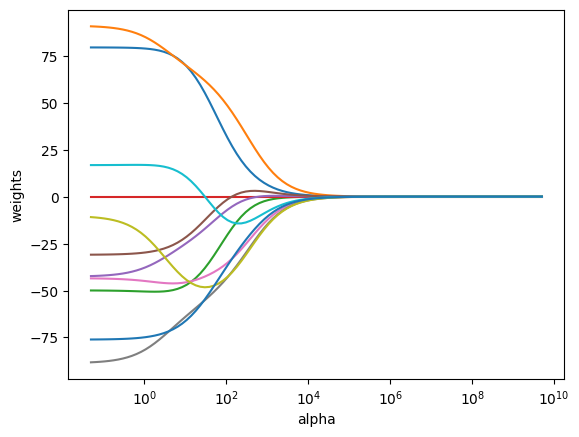

In [121]:
# Graficamos los valores de alpha
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [122]:
# Dividimos o partimos la data en train y test
X_train, X_test , Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [123]:
# Normaliza los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [124]:
# Le asignamos un valor pequeño a alpha y observamos que pasa con el error en el test
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train_scaled, Y_train)            # Ajustamos el modelo ridge

Ridge(alpha=0.001)

In [125]:
# print(pd.Series(ridge.coef_, index = X.columns).sort_values(ascending=False)) # Pintamos los coeficientes
print(pd.Series(ridge.coef_, index = X.columns)) # Pintamos los coeficientes

% Peso_VERDES_ propios          52.806717
% Peso_MADUROS_ propios        104.548898
% Peso_SMADUROS_ propios       -41.750975
% Peso_ESCOBAJO_ propios         0.000000
% Peso_MALFORMADOA_ propios    -15.558735
% Peso_MALFORMADOB_ propios    -19.705521
% Peso_VERDES_ terceros        -31.409931
% Peso_MADUROS_ terceros       -95.118393
% Peso_SMADUROS_ terceros       15.285808
% Peso_ESCOBAJO_ terceros       -0.369309
% Peso_MALFORMADO_ terceros    -75.268911
dtype: float64


In [126]:
# Obtenemos las predicciones
X_pred_rg = ridge.predict(X_train_scaled)
Y_pred_rg = ridge.predict(X_test_scaled)

In [127]:
# Obtenemos las funciones de coste
print ('Error cuadrático medio:')
print('Train:',mean_squared_error(Y_train, X_pred_rg))
print('Test:',mean_squared_error(Y_test, Y_pred_rg),'\n')

print ('Raiz Error cuadrático medio:')
print('Train:',np.sqrt(mean_squared_error(Y_train, X_pred_rg)))
print('Test:',np.sqrt(mean_squared_error(Y_test, Y_pred_rg)),'\n')

print ('R cuadrado:')
print('Train:',r2_score(Y_train, X_pred_rg))
print('Test:',r2_score(Y_test, Y_pred_rg))

Error cuadrático medio:
Train: 35650.8608456986
Test: 36035.39475536347 

Raiz Error cuadrático medio:
Train: 188.81435550746292
Test: 189.82991006520407 

R cuadrado:
Train: 0.6248029849975706
Test: 0.5581712233767977


In [128]:
# Le asignamos un valor grande a alpha y observamos que pasa con el error en el test
ridge2 = Ridge(alpha = 10)
ridge2.fit(X_train_scaled, Y_train)             # Ajuste del modelo ridge

Ridge(alpha=10)

In [129]:
print(pd.Series(ridge2.coef_, index = X.columns)) 

% Peso_VERDES_ propios         50.189301
% Peso_MADUROS_ propios        71.111984
% Peso_SMADUROS_ propios      -36.458736
% Peso_ESCOBAJO_ propios        0.000000
% Peso_MALFORMADOA_ propios    -2.984008
% Peso_MALFORMADOB_ propios    -7.370228
% Peso_VERDES_ terceros       -35.039621
% Peso_MADUROS_ terceros      -60.620244
% Peso_SMADUROS_ terceros     -38.713297
% Peso_ESCOBAJO_ terceros      -1.265077
% Peso_MALFORMADO_ terceros   -60.031468
dtype: float64


In [137]:
# Obtenemos las predicciones
X_pred_rg2 = ridge2.predict(X_train_scaled)
Y_pred_rg2 = ridge2.predict(X_test_scaled)

In [138]:
# Obtenemos las funciones de coste
print ('Error cuadrático medio:')
print('Train:',mean_squared_error(Y_train, X_pred_rg2))
print('Test:',mean_squared_error(Y_test, Y_pred_rg2),'\n')

print ('Raiz Error cuadrático medio:')
print('Train:',np.sqrt(mean_squared_error(Y_train, X_pred_rg2)))
print('Test:',np.sqrt(mean_squared_error(Y_test, Y_pred_rg2)),'\n')

print ('R cuadrado:')
print('Train:',r2_score(Y_train, X_pred_rg2))
print('Test:',r2_score(Y_test, Y_pred_rg2))

Error cuadrático medio:
Train: 36190.961302668045
Test: 38093.893915012006 

Raiz Error cuadrático medio:
Train: 190.2392212522645
Test: 195.17657112218157 

R cuadrado:
Train: 0.619118856355251
Test: 0.5329320336423207


In [132]:
# Podemos hallar el mejor valor de alpha por Cv
# ---------------------------------------------
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train_scaled, Y_train)
ridgecv.alpha_

17.96906831902313

In [133]:
# Probamos la regresión Rige con el mejor alpha
ridge3 = Ridge(alpha = ridgecv.alpha_)
ridge3.fit(X_train_scaled, Y_train)             # Ajuste del modelo ridge

Ridge(alpha=17.96906831902313)

In [134]:
# Obtenemos las predicciones
X_pred_rg3 = ridge3.predict(X_train_scaled)
Y_pred_rg3 = ridge3.predict(X_test_scaled)

In [135]:
# Obtenemos las funciones de coste
print ('Error cuadrático medio:')
print('Train:',mean_squared_error(Y_train, X_pred_rg3))
print('Test:',mean_squared_error(Y_test, Y_pred_rg3),'\n')

print ('Raiz Error cuadrático medio:')
print('Train:',np.sqrt(mean_squared_error(Y_train, X_pred_rg3)))
print('Test:',np.sqrt(mean_squared_error(Y_test, Y_pred_rg3)),'\n')

print ('R cuadrado:')
print('Train:',r2_score(Y_train, X_pred_rg3))
print('Test:',r2_score(Y_test, Y_pred_rg3))

Error cuadrático medio:
Train: 36740.894034630386
Test: 39998.311760803175 

Raiz Error cuadrático medio:
Train: 191.67914345235997
Test: 199.99577935747337 

R cuadrado:
Train: 0.6133312508223177
Test: 0.5095820297725817


In [136]:
print(pd.Series(ridge3.coef_, index = X.columns))

% Peso_VERDES_ propios         46.069538
% Peso_MADUROS_ propios        64.962021
% Peso_SMADUROS_ propios      -30.626960
% Peso_ESCOBAJO_ propios        0.000000
% Peso_MALFORMADOA_ propios    -1.622841
% Peso_MALFORMADOB_ propios    -2.607757
% Peso_VERDES_ terceros       -34.572371
% Peso_MADUROS_ terceros      -55.493224
% Peso_SMADUROS_ terceros     -42.451629
% Peso_ESCOBAJO_ terceros      -4.674174
% Peso_MALFORMADO_ terceros   -53.790486
dtype: float64


In [139]:
df_coef = pd.Series(ridge3.coef_, index = X.columns)
df_coef

% Peso_VERDES_ propios         46.069538
% Peso_MADUROS_ propios        64.962021
% Peso_SMADUROS_ propios      -30.626960
% Peso_ESCOBAJO_ propios        0.000000
% Peso_MALFORMADOA_ propios    -1.622841
% Peso_MALFORMADOB_ propios    -2.607757
% Peso_VERDES_ terceros       -34.572371
% Peso_MADUROS_ terceros      -55.493224
% Peso_SMADUROS_ terceros     -42.451629
% Peso_ESCOBAJO_ terceros      -4.674174
% Peso_MALFORMADO_ terceros   -53.790486
dtype: float64

In [140]:
function_save(df_coef)

Datos guardados en C:/cesar_quezada/ProyectosIA/Proyectos_PALMAS/PROYECTO_01_analitica_descriptiva_TEA/data/processed/__bbdd_revision__.xlsx


### 5. Regresión Penalizada : Lasso

In [82]:
from sklearn.preprocessing import scale  
from sklearn.model_selection import train_test_split # Partición muestral
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [90]:
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train_scaled), Y_train)
    coefs.append(lasso.coef_)

print(len(coefs))

100


Text(0, 0.5, 'weights')

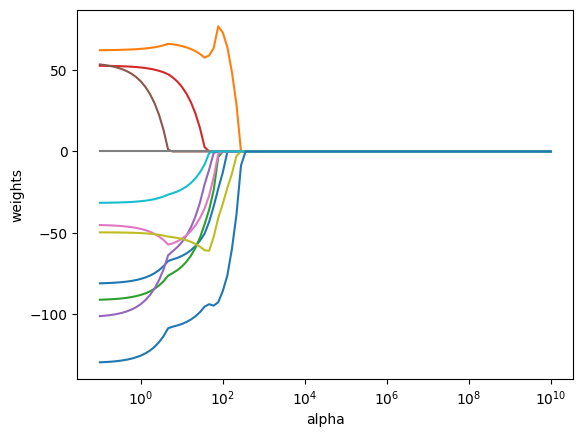

In [91]:
# Graficamos los valores de alpha
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [92]:
# Elegimos el mejor o el valor más óptimo de alpha por Cv
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000)
lassocv.fit(X_train_scaled, Y_train)
lassocv.alpha_

42.06167515912734

In [93]:
lasso = Lasso(alpha=lassocv.alpha_ ,max_iter = 10000)
lasso.fit(X_train_scaled, Y_train)

Lasso(alpha=42.06167515912734, max_iter=10000)

In [94]:
# Obtenemos las predicciones
X_pred_lasso = lasso.predict(X_train_scaled)
Y_pred_lasso = lasso.predict(X_test_scaled)

In [95]:
# Obtenemos las funciones de coste
print ('Error cuadrático medio:')
print('Train:',mean_squared_error(Y_train, X_pred_lasso))
print('Test:',mean_squared_error(Y_test, Y_pred_lasso),'\n')

print ('Raiz Error cuadrático medio:')
print('Train:',np.sqrt(mean_squared_error(Y_train, X_pred_lasso)))
print('Test:',np.sqrt(mean_squared_error(Y_test, Y_pred_lasso)),'\n')

print ('R cuadrado:')
print('Train:',r2_score(Y_train, X_pred_lasso))
print('Test:',r2_score(Y_test, Y_pred_lasso))

Error cuadrático medio:
Train: 79728.21043336453
Test: 109401.78225440042 

Raiz Error cuadrático medio:
Train: 282.3618430903236
Test: 330.7594023673407 

R cuadrado:
Train: 0.33640868664278534
Test: 0.2941763196131477


In [ ]:
#Gracias!